Load required libraries

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import sklearn as sk
import seaborn as sns
from scipy.stats import t

#Upload files from directory

In [13]:
uploaded = files.upload()
dr = pd.read_csv('Afatinib.csv')

Saving Afatinib.csv to Afatinib (1).csv


In [14]:
uploaded = files.upload()
target = pd.read_csv('AfatinibTarget.csv')

Saving AfatinibTarget.csv to AfatinibTarget (1).csv


##Data processing

In [15]:
dr=dr.drop(columns=['Unnamed: 0'])

In [16]:
target=target.drop(columns=['Unnamed: 0'])

In [17]:
full = pd.concat([dr, target], axis=1)

In [18]:
full

,ENSG00000111206,ENSG00000254480,ENSG00000167881,ENSG00000118197,ENSG00000140563,ENSG00000243660,ENSG00000100982,ENSG00000221837,ENSG00000112983,ENSG00000196712,0
0,3.977,2.931,8.500,7.484,3.631,3.289,3.473,3.343,7.707,3.563,8.177
1,3.416,2.617,8.748,6.245,3.723,3.199,4.084,3.413,7.306,3.549,2.025
2,3.615,2.657,8.329,5.319,3.144,2.910,3.789,3.245,7.666,3.380,3.889
3,4.688,3.035,9.413,5.465,3.661,2.689,3.714,3.351,7.156,4.036,0.958
4,4.226,3.141,8.518,6.371,3.125,3.220,3.781,3.035,7.085,3.909,5.497
...,...,...,...,...,...,...,...,...,...,...,...
753,4.337,2.785,9.315,6.481,5.616,3.549,3.663,3.269,7.706,3.840,0.981
754,4.618,2.783,9.519,5.253,4.241,3.486,2.971,3.050,8.010,3.982,15.951
755,5.139,3.098,9.042,5.594,3.103,2.863,3.381,3.281,7.735,3.655,5.745
756,4.771,2.914,8.733,7.049,4.227,3.110,5.858,3.437,7.678,3.938,4.960


Rename target column

In [19]:
full.rename(columns={'0': 'cell'}, inplace=True)

In [20]:
full.sort_values(by='cell')

,ENSG00000111206,ENSG00000254480,ENSG00000167881,ENSG00000118197,ENSG00000140563,ENSG00000243660,ENSG00000100982,ENSG00000221837,ENSG00000112983,ENSG00000196712,cell
127,4.536,2.699,8.796,5.682,3.801,3.156,3.996,3.570,6.431,3.605,0.000000e+00
220,3.280,2.729,9.246,6.311,3.611,3.154,3.645,3.826,7.074,3.561,2.000000e-03
626,4.705,3.217,8.506,6.137,3.338,2.730,3.649,3.739,6.389,3.715,4.000000e-03
517,3.648,3.381,8.729,4.875,3.831,3.388,3.238,3.493,7.699,3.935,5.000000e-03
214,3.485,2.964,8.987,6.434,3.575,3.582,3.391,3.184,7.600,3.638,1.300000e-02
...,...,...,...,...,...,...,...,...,...,...,...
475,5.022,2.833,8.905,6.511,3.539,2.866,3.231,3.217,8.193,3.988,8.014101e+03
100,5.426,2.804,9.295,6.387,3.636,3.066,3.815,3.409,7.250,5.041,2.030487e+04
570,7.160,2.717,9.067,6.265,3.249,2.951,3.377,3.280,6.718,3.423,4.292898e+04
420,5.400,2.734,8.724,5.112,3.238,3.025,3.148,3.255,7.594,3.859,1.133601e+05


In [21]:
full = full.iloc[:-30].copy()

# Handle outliers

## Fix outiers Z-scores

<Axes: xlabel='cell'>

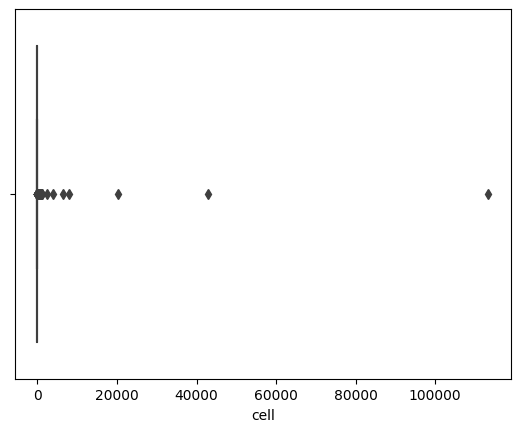

In [27]:
sns.boxplot(x=full.cell)

In [28]:
target = np.array(full.cell)

# Calculate Z-scores for target variable
z_scores = (target - np.mean(target)) / np.std(target)

# Set threshold for Z-score values
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove outliers from target variable
target = np.delete(target, outlier_indices)
print(f"Initial target variable shape: {full.cell.shape}")
print(f"Target variable shape after removing outliers: {target.shape}")

Initial target variable shape: (727,)
Target variable shape after removing outliers: (724,)


In [29]:
outlier_indices

array([100, 420, 570])

In [30]:
full.drop(outlier_indices, inplace=True)

<Axes: xlabel='cell'>

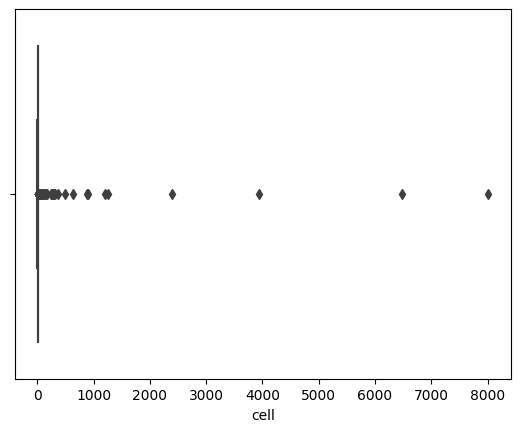

In [31]:
sns.boxplot(x=full.cell)

##precentiles

In [32]:
q1, q3 = np.percentile(target, [25, 75])
iqr = q3 - q1

# Set threshold for IQR values
threshold = 1.5
outlier_indices = np.where((target < q1 - threshold * iqr) | (target > q3 + threshold * iqr))[0]

# Remove outliers from target variable
target = np.delete(target, outlier_indices)

print(f"Initial target variable shape: {target.shape}")
print(f"Target variable shape after removing outliers: {target.shape}")

Initial target variable shape: (654,)
Target variable shape after removing outliers: (654,)


<Axes: xlabel='cell'>

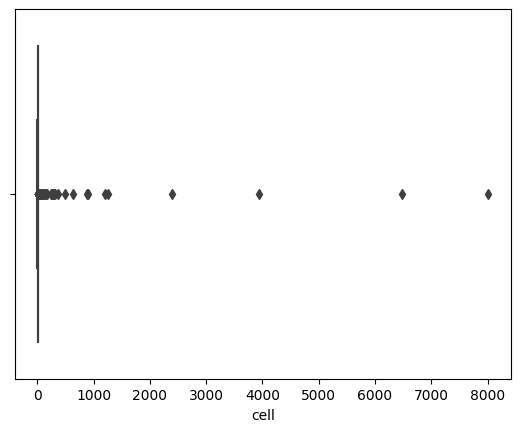

In [33]:
sns.boxplot(x=full.cell)

In [34]:
full.drop(outlier_indices, inplace=True)

<Axes: xlabel='cell'>

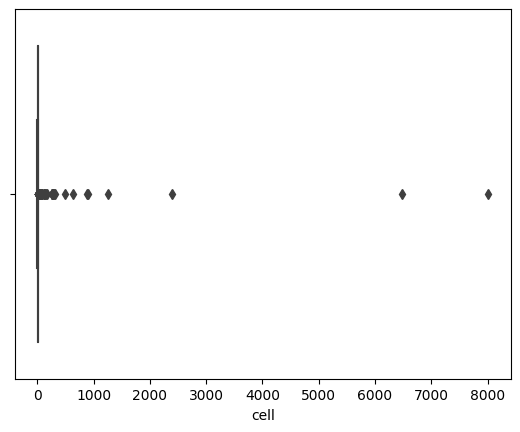

In [35]:
sns.boxplot(x=full.cell)

In [36]:
target = pd.DataFrame(target)

In [37]:
full

,ENSG00000111206,ENSG00000254480,ENSG00000167881,ENSG00000118197,ENSG00000140563,ENSG00000243660,ENSG00000100982,ENSG00000221837,ENSG00000112983,ENSG00000196712,cell
0,3.977,2.931,8.500,7.484,3.631,3.289,3.473,3.343,7.707,3.563,8.177
1,3.416,2.617,8.748,6.245,3.723,3.199,4.084,3.413,7.306,3.549,2.025
2,3.615,2.657,8.329,5.319,3.144,2.910,3.789,3.245,7.666,3.380,3.889
3,4.688,3.035,9.413,5.465,3.661,2.689,3.714,3.351,7.156,4.036,0.958
4,4.226,3.141,8.518,6.371,3.125,3.220,3.781,3.035,7.085,3.909,5.497
...,...,...,...,...,...,...,...,...,...,...,...
723,4.361,2.831,9.080,6.049,3.762,2.957,4.390,3.051,7.208,3.623,8.199
724,5.247,2.997,8.427,6.423,3.101,3.229,3.231,3.342,7.375,3.551,7.920
725,4.975,2.728,8.671,5.247,3.647,3.320,3.385,3.171,7.075,3.529,10.176
726,4.315,2.541,9.082,6.231,3.044,3.353,3.135,3.042,8.170,3.382,18.448


# Built the underlying regression model (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config

In [ ]:
column_name_to_drop = 'cell'
new_df = full[[column_name_to_drop]].copy()
full.drop(columns=[column_name_to_drop], inplace=True)

In [ ]:
y=new_df
x=full

Spilt the data

In [ ]:
x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.10)

Train and fit the model

In [ ]:
set_config(print_changed_only=False)

rfr = RandomForestRegressor()
print(rfr)

RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
rfr.fit(xtrain, ytrain)
score = rfr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.8616708546567164


In [ ]:
ypred = rfr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  7.39601154460969
RMSE:  3.698005772304845


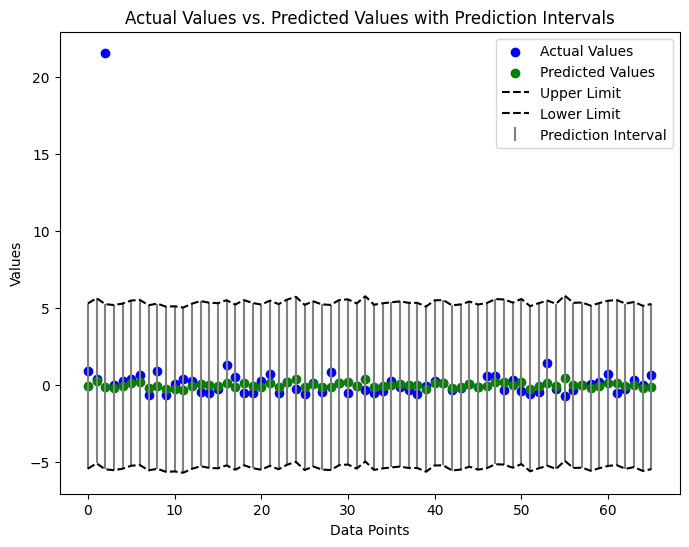

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Sample data (actual values, predicted values, and residuals)
actual_values = np.array(ytest)
predicted_values = np.array(ypred)
residuals = actual_values - predicted_values

# Calculate standard error of residuals
std_error = np.std(residuals, ddof=1)  # ddof=1 for unbiased estimation

# Define confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate degrees of freedom
degrees_freedom = len(residuals) - 1

# Calculate t-score for given confidence level and degrees of freedom
t_score = t.ppf((1 + confidence_level) / 2, df=degrees_freedom)

# Calculate prediction interval
prediction_interval = t_score * std_error

# Calculate upper and lower prediction limits
upper_limit = predicted_values + prediction_interval
lower_limit = predicted_values - prediction_interval

# Create a scatter plot with error bars
plt.figure(figsize=(8, 6))
plt.scatter(range(len(actual_values)), actual_values, color='blue', label='Actual Values')
plt.scatter(range(len(predicted_values)), predicted_values, color='green', label='Predicted Values')
plt.errorbar(range(len(predicted_values)), predicted_values, yerr=prediction_interval, fmt='none', ecolor='grey', label='Prediction Interval')

# Highlight upper and lower prediction limits
plt.plot(range(len(predicted_values)), upper_limit, linestyle='dashed', color='black', label='Upper Limit')
plt.plot(range(len(predicted_values)), lower_limit, linestyle='dashed', color='black', label='Lower Limit')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual Values vs. Predicted Values with Prediction Intervals')
plt.legend()
plt.show()


#ICP regression

Spilt the data in calibration set

In [ ]:
x_tr,xcal,y_tr,ycal=train_test_split(xtrain, ytrain, test_size=0.20)

Fit the calibration set in the regression model

In [ ]:
rfr.fit(xcal, ycal)

scorecal = rfr.score(xcal, ycal)
print("R-squared:", scorecal)

R-squared: 0.8612650476685281


In [ ]:
ypredcal = rfr.predict(xcal)

In [ ]:
msecal = mean_squared_error(ycal, ypredcal)

In [ ]:
msecal

0.023479647535411444

In [ ]:
actual_valuescal = np.array(ycal)
predicted_valuescal = np.array(ypredcal)
residualscal = actual_valuescal - predicted_valuescal

std_errorcal = np.std(residualscal, ddof=1)

confidence_level = 0.95

degrees_freedomcal = len(residualscal) - 1

t_scorecal = t.ppf((1 + confidence_level) / 2, df=degrees_freedomcal)

prediction_intervalcal = t_scorecal * std_errorcal

upper_limitcal = predicted_valuescal + prediction_intervalcal
lower_limitcal = predicted_valuescal - prediction_intervalcal

Now we start the conformal prediction

In [ ]:
alpha = 0.1
n=123
cal_scores = np.maximum(ypredcal-upper_limitcal, lower_limitcal-ypredcal)
# Get the score quantile
qhat = np.quantile(cal_scores, np.ceil((n+1)*(1-alpha))/n, interpolation='higher')
# Deploy (output=lower and upper adjusted quantiles)
prediction_sets = [lower_limit - qhat, upper_limit + qhat]

The next 2 code lines constract the prediction intervals by add and substact the q quantile from the upper and lower limit of the prediction

In [ ]:
predupper=upper_limit + qhat

In [ ]:
predlower=lower_limit - qhat

The empirical coverage

In [ ]:
prediction_sets_uncalibrated = [lower_limit, upper_limit]
empirical_coverage_uncalibrated = ((ypred >= prediction_sets_uncalibrated[0]) & (ypred <= prediction_sets_uncalibrated[1])).mean()
print(f"The empirical coverage before calibration is: {empirical_coverage_uncalibrated}")

empirical_coverage = ((ypred >= prediction_sets[0]) & (ypred <= prediction_sets[1])).mean()
print(f"The empirical coverage after calibration is: {empirical_coverage}")